## Importing modules

In [2]:
from tensorflow.keras.layers import Flatten,Input,Lambda,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

### using imagenet weights

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
for layer in resnet.layers:
    layer.trainable = False

In [17]:
folders = glob('Datasets/train/*')

In [18]:
x = Flatten()(resnet.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 698 images belonging to 10 classes.


In [24]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 10 classes.


In [26]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18944\1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
22/22 [==============================] - 181s 8s/step - loss: 7.8258 - accuracy: 0.1103 - val_loss: 4.5460 - val_accuracy: 0.1433
Epoch 2/50
22/22 [==============================] - 192s 9s/step - loss: 3.2029 - accuracy: 0.1748 - val_loss: 3.5701 - val_accuracy: 0.2400
Epoch 3/50
22/22 [==============================] - 187s 9s/step - loss: 3.3214 - accuracy: 0.1891 - val_loss: 2.8165 - val_accuracy: 0.1900
Epoch 4/50
22/22 [==============================] - 182s 8s/step - loss: 2.6210 - accuracy: 0.2049 - val_loss: 2.1471 - val_accuracy: 0.2300
Epoch 5/50
22/22 [==============================] - 173s 8s/step - loss: 2.3469 - accuracy: 0.2521 - val_loss: 2.5913 - val_accuracy: 0.2633
Epoch 6/50
22/22 [==============================] - 189s 9s/step - loss: 2.5841 - accuracy: 0.2450 - val_loss: 1.8656 - val_accuracy: 0.3733
Epoch 7/50
22/22 [==============================] - 191s 9s/step - loss: 2.1773 - accuracy: 0.3238 - val_loss: 2.4157 - val_accuracy: 0.3200
Epoch 8/50
22

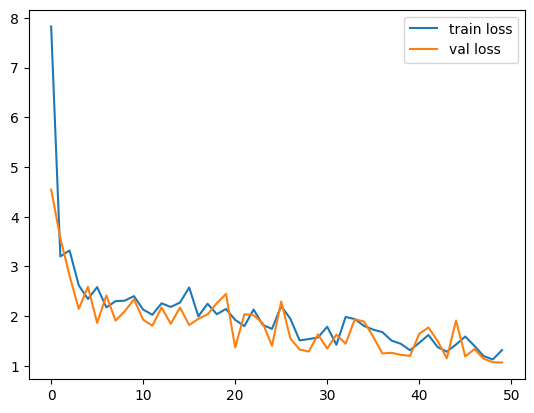

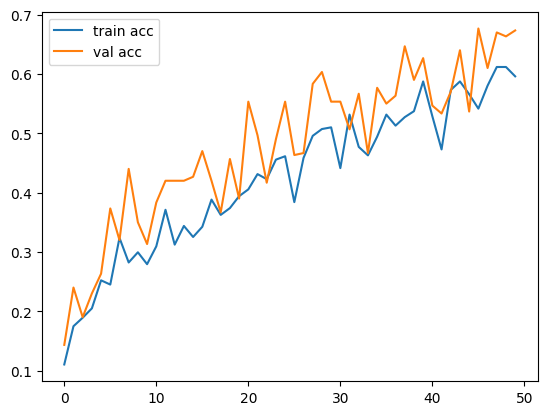

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [31]:
y_pred = model.predict(test_set)
y_pred


10/10 [==============================] - 55s 5s/step


array([[7.4144355e-03, 4.5883167e-03, 2.2379699e-01, ..., 3.5166896e-03,
        5.0003909e-02, 9.4867945e-02],
       [2.1581718e-06, 3.6409378e-04, 8.5059744e-01, ..., 4.0678282e-05,
        3.9354130e-03, 3.1303160e-03],
       [1.9920071e-05, 5.1558105e-04, 9.8396629e-01, ..., 3.2402010e-04,
        8.1015537e-03, 8.0271158e-05],
       ...,
       [8.3783544e-07, 7.6320134e-07, 1.6046881e-03, ..., 3.1682546e-08,
        2.8851084e-04, 3.1055386e-06],
       [9.3382056e-05, 1.0906214e-05, 2.6195555e-03, ..., 5.5541808e-04,
        1.8487453e-03, 3.1822801e-03],
       [4.7443969e-05, 1.7811284e-05, 3.8626122e-01, ..., 3.0228848e-06,
        5.6663048e-02, 1.4111255e-01]], dtype=float32)

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 2, 2, 2, 6, 6, 8, 2, 5, 1, 9, 2, 1, 3, 9, 5, 7, 4, 5, 3, 0, 4,
       6, 5, 2, 6, 9, 2, 8, 9, 8, 4, 2, 6, 3, 9, 2, 6, 9, 8, 5, 9, 2, 2,
       8, 8, 8, 6, 0, 3, 8, 3, 6, 2, 6, 7, 5, 1, 4, 7, 9, 4, 7, 3, 2, 9,
       8, 8, 2, 4, 8, 8, 8, 5, 9, 8, 2, 6, 3, 2, 8, 5, 5, 2, 1, 9, 5, 8,
       6, 4, 5, 8, 2, 8, 1, 0, 9, 6, 5, 6, 1, 2, 2, 8, 4, 8, 3, 6, 5, 9,
       8, 8, 2, 9, 3, 5, 4, 4, 2, 5, 6, 6, 5, 9, 5, 1, 5, 2, 6, 5, 1, 2,
       5, 3, 3, 5, 8, 6, 0, 2, 1, 3, 9, 1, 8, 2, 6, 2, 6, 9, 8, 9, 9, 8,
       9, 3, 1, 5, 3, 3, 8, 9, 3, 9, 4, 1, 7, 7, 5, 3, 6, 8, 3, 6, 4, 2,
       3, 2, 2, 2, 6, 8, 9, 5, 6, 8, 6, 2, 5, 6, 8, 2, 9, 8, 8, 9, 2, 8,
       4, 9, 0, 7, 9, 2, 2, 4, 7, 3, 1, 1, 8, 1, 0, 3, 6, 6, 5, 6, 2, 8,
       8, 4, 3, 4, 9, 7, 9, 6, 2, 2, 3, 2, 7, 2, 5, 8, 8, 6, 1, 4, 8, 4,
       8, 0, 9, 6, 8, 6, 3, 8, 4, 8, 8, 5, 4, 3, 3, 6, 9, 8, 2, 1, 6, 9,
       2, 6, 9, 4, 2, 2, 9, 6, 8, 4, 1, 3, 4, 4, 1, 6, 4, 8, 8, 1, 6, 0,
       8, 2, 2, 9, 4, 3, 2, 6, 2, 4, 8, 6, 4, 2], d

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [93]:
img=image.load_img(r'C:\Users\DELL\OneDrive\Desktop\Proj\Car-Model-Detection\Datasets\Test\volkswagen\volkswagen_76.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[217., 222., 226.],
        [212., 217., 221.],
        [215., 220., 224.],
        ...,
        [215., 220., 223.],
        [216., 220., 223.],
        [215., 220., 223.]],

       [[215., 220., 224.],
        [214., 219., 223.],
        [215., 220., 224.],
        ...,
        [217., 222., 225.],
        [215., 220., 223.],
        [212., 222., 223.]],

       [[211., 216., 220.],
        [211., 219., 222.],
        [213., 221., 223.],
        ...,
        [215., 220., 223.],
        [214., 219., 223.],
        [213., 218., 221.]],

       ...,

       [[163., 162., 167.],
        [161., 162., 166.],
        [162., 163., 167.],
        ...,
        [165., 166., 168.],
        [167., 165., 168.],
        [167., 167., 169.]],

       [[163., 162., 167.],
        [165., 165., 167.],
        [162., 163., 167.],
        ...,
        [164., 164., 166.],
        [164., 164., 166.],
        [165., 165., 167.]],

       [[163., 164., 166.],
        [162., 162., 164.],
        [162., 1

In [94]:
x.shape
x=x/255

In [95]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [96]:
model.predict(img_data)

1/1 [==============================] - 0s 331ms/step


array([[1.6222678e-16, 4.1358552e-20, 9.2537299e-08, 1.5398975e-17,
        5.9225189e-13, 2.0918118e-09, 5.0983693e-09, 1.3586120e-14,
        1.1624784e-08, 9.9999988e-01]], dtype=float32)

In [97]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 229ms/step


array([9], dtype=int64)